Read file cardio_train.csv into a data dataframe

In [1]:
import pandas as pd
data = pd.read_csv("cardio_train.csv", sep=';')
display(data)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Print dimension of the dataframe

In [2]:
print(data.shape)

(70000, 13)


Print column names of the dataframe

In [3]:
print(data.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


Select values of the colums age into an array

In [4]:
import numpy as np
age_array = data['age'].values
print(age_array)

[18393 20228 18857 ... 19066 22431 20540]


Compute the year of the age values

In [5]:
year_array = age_array/365.25
print(year_array)

[50.35728953 55.38124572 51.62765229 ... 52.19986311 61.41273101
 56.23545517]


Compute the mean of the age values

In [6]:
print(np.mean(age_array))

19468.865814285713


Compute maximum and minimum of the age values

In [7]:
print("Maximum age value:" ,np.max(age_array))
print("Minimum age value:" ,np.min(age_array))

Maximum age value: 23713
Minimum age value: 10798


Split data into training and test datas

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('cardio', axis=1)
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

Scale data using standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=49)

Train the model

In [11]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=49)

Predict the output

In [12]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[1 1 0 ... 1 0 0]


Compare the predicted output with the real value

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:" , accuracy)

Accuracy: 0.7224285714285714


Print the importance of the features

In [14]:
print(data.columns[np.argmax(model.coef_[0])])

ap_hi


Print all features and their values of one proband

In [15]:
data.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0


Visualize feature important in a bar chart

C:\Users\msabh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msabh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msabh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


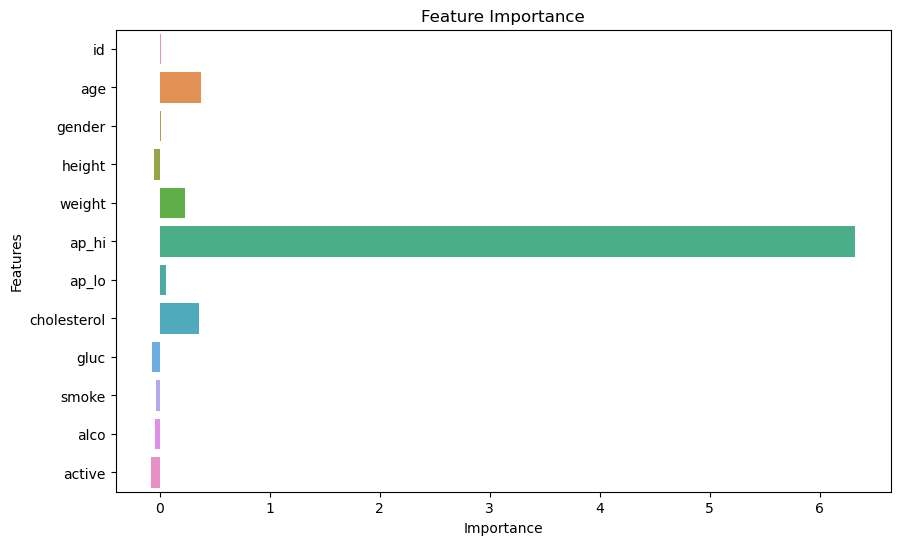

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.coef_[0]
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()